In [1]:
import pandas as pd

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
data.drop('id',inplace=True,axis=1)

In [3]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,21770,1,156,64.0,140,80,2,1,0,0,1,1
1,21876,1,170,85.0,160,90,1,1,0,0,1,1
2,23270,1,151,90.0,130,80,1,1,0,0,1,1
3,19741,1,159,97.0,120,80,1,1,0,0,1,1
4,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [4]:
data['age'] = round(data['age'] / 365)
target = data['cardio']

In [5]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,60.0,1,156,64.0,140,80,2,1,0,0,1,1
1,60.0,1,170,85.0,160,90,1,1,0,0,1,1
2,64.0,1,151,90.0,130,80,1,1,0,0,1,1
3,54.0,1,159,97.0,120,80,1,1,0,0,1,1
4,50.0,1,164,68.0,120,80,1,1,0,0,1,0


In [6]:
def transform_age_cat(age):
    if age < 40:
        return 0
    elif age < 50 and age >= 40:
        return 1

    elif age >= 50:
        return 2

data['age_cat'] = data['age'].apply(transform_age_cat)

In [7]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cat
0,60.0,1,156,64.0,140,80,2,1,0,0,1,1,2
1,60.0,1,170,85.0,160,90,1,1,0,0,1,1,2
2,64.0,1,151,90.0,130,80,1,1,0,0,1,1,2
3,54.0,1,159,97.0,120,80,1,1,0,0,1,1,2
4,50.0,1,164,68.0,120,80,1,1,0,0,1,0,2


In [8]:
var_to_be_used = data.columns
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cat
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,53.355911,1.349589,164.365982,74.230355,128.805893,96.328304,1.368446,1.228179,0.087357,0.053786,0.804536,0.499661,1.726875
std,6.759334,0.476845,8.234173,14.447613,150.301500,180.333494,0.681350,0.574311,0.282360,0.225596,0.396561,0.500004,0.458409
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<Axes: xlabel='age_cat', ylabel='count'>

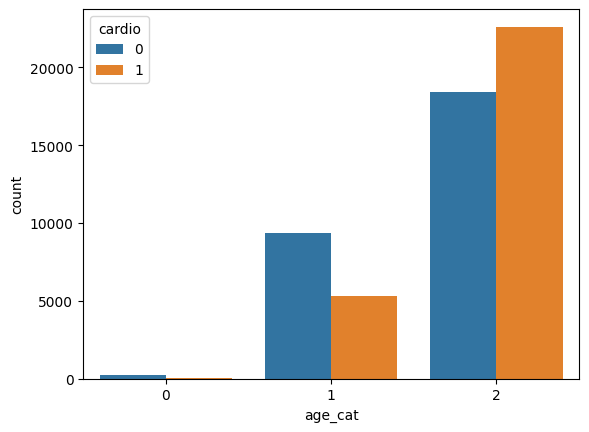

In [9]:
# plot age_cat vs target
import seaborn as sns
sns.countplot(x='age_cat',hue='cardio',data=data)

In [10]:

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

x_train, x_val, y_train, y_val = train_test_split(data.drop('cardio', axis=1), data['cardio'], test_size=0.2, random_state=0)
var_to_be_used = ['ap_hi', 'ap_lo', 'age', 'weight', 'gluc', 'cholesterol', 'smoke', 'alco', 'active']

numerical_features = ['ap_hi', 'ap_lo', 'weight', 'age']
categorical_features = ['gluc', 'cholesterol', 'smoke', 'alco', 'active',]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

data_transformed = preprocessor.fit_transform(x_train)
val_transformed = preprocessor.transform(x_val)

In [94]:
data_transformed.shape

(44800, 16)

In [12]:
import xgboost as xgb

In [87]:

import optuna

from sklearn.metrics import accuracy_score, precision_score
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }


    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(data_transformed, y_train)


    y_pred = optuna_model.predict(val_transformed)


    precision = precision_score(y_val, y_pred)

    return precision
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=8, timeout=600 * 3)

[I 2023-04-20 16:42:28,296] A new study created in memory with name: no-name-6b8c95e9-3ab6-481f-96bf-f316c99160ce
/tmp/ipykernel_9899/3601086200.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_9899/3601086200.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipykernel_9899/3601086200.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_floa

In [88]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7790601813685079
  Params: 
    max_depth: 64
    learning_rate: 0.9680069664291205
    n_estimators: 360
    min_child_weight: 42
    gamma: 2.0200038185671306e-05
    subsample: 0.8544181298113709
    colsample_bytree: 0.012131425705196265
    reg_alpha: 7.761497059889927e-06
    reg_lambda: 0.6839098271806342


In [89]:
trial.params

{'max_depth': 64,
 'learning_rate': 0.9680069664291205,
 'n_estimators': 360,
 'min_child_weight': 42,
 'gamma': 2.0200038185671306e-05,
 'subsample': 0.8544181298113709,
 'colsample_bytree': 0.012131425705196265,
 'reg_alpha': 7.761497059889927e-06,
 'reg_lambda': 0.6839098271806342}

In [13]:
params = trial.params
model = xgb.XGBClassifier(**params)

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, data_transformed, y_train, cv=kf, scoring='precision', n_jobs=8)
scores_accuracy = cross_val_score(model, data_transformed, y_train, cv=kf, scoring='accuracy', n_jobs=8)

print('precision: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))
print('accuracy: {:.2f} +/- {:.2f}'.format(scores_accuracy.mean(), scores_accuracy.std()))

precision: 0.77 +/- 0.00
accuracy: 0.73 +/- 0.01


In [19]:
full_data = preprocessor.transform(data.drop('cardio', axis=1))
model.fit(full_data, data['cardio'])
xgboost_pred = model.predict(val_transformed)

pd.DataFrame(xgboost_pred).to_csv('xgboost.csv', index=False, header=False)

In [75]:
model.fit(data_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.055240716417472226, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.2174695610100952e-05, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.8362189302931353, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=56, max_leaves=None,
              min_child_weight=37, missing=nan, monotone_constraints=None,
              n_estimators=469, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
data_test = pd.read_csv('test.csv')
test_target = data_test['cardio']

In [77]:
data_test.head()
data_test['age'] = round(data_test['age'] / 365)

In [79]:
data_test_transformed = preprocessor.transform(data_test.drop('cardio', axis=1))
data_test_transformed

array([[0.01670792, 0.01390268, 0.28421053, ..., 0.        , 0.        ,
        1.        ],
       [0.01608911, 0.01489573, 0.36842105, ..., 0.        , 0.        ,
        1.        ],
       [0.01608911, 0.01489573, 0.26315789, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01670792, 0.01489573, 0.48421053, ..., 0.        , 0.        ,
        1.        ],
       [0.0154703 , 0.01390268, 0.25789474, ..., 0.        , 0.        ,
        1.        ],
       [0.01608911, 0.01390268, 0.38421053, ..., 0.        , 0.        ,
        1.        ]])

In [80]:
data_test_transformed.shape

(14000, 18)

In [81]:
y_pred = model.predict(data_test_transformed)
precision_score(test_target, y_pred)

0.7721742197143361